In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from itertools import compress

In [2]:
df = pd.read_csv("../data/train.csv")
lab = df["label"].values

In [3]:
dates_ = df["date"].values
print(dates_[0])

Thu, 17 Mar 2016 01:57:16 +0000


In [4]:
times = []
i = 0
for d in dates_:
    m = re.search("..:..:..",d)
    t = datetime.strptime(m.group(0), "%X")
    s = 60*60*t.hour + 60*t.minute + t.second
    times.append(s)

In [5]:
up =list(compress(times, lab == 0))
so =list(compress(times, lab == 1))
fo =list(compress(times, lab == 2))
pr =list(compress(times, lab == 3))

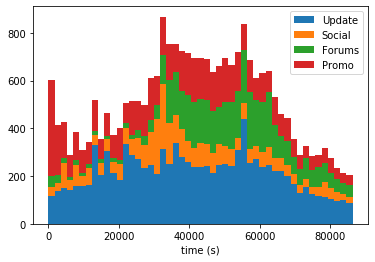

In [7]:
bins = np.linspace(0,max(times),50)
plt.hist([up,so,fo,pr],bins = bins, stacked=True)
plt.legend(["Update", "Social", "Forums", "Promo"])
plt.xlabel("time (s)")
plt.savefig("time.png")